# Decision Trees

In [1294]:
from sklearn import datasets, metrics, tree, model_selection, pipeline, ensemble
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1295]:
np.random.seed(0)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (12.8, 7.2)

In [1296]:
breastCancer = datasets.load_breast_cancer(as_frame=True)

In [1297]:
breastCancer.frame.shape

(569, 31)

In [1298]:
breastCancer.frame.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [1299]:
breastCancer.data.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [1300]:
breastCancer.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

In [1301]:
breastCancer.target.nunique()

2

In [1302]:
X = breastCancer.data
y = breastCancer.target
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [1303]:
decision_tree_grid = [
  {
    "max_depth": [1, 3, 5, 7, 9, 11, 13],
    "min_samples_leaf": [1, 3, 5, 7, 9, 11, 13],
  }
]
model = model_selection.GridSearchCV(
  tree.DecisionTreeClassifier(),
  decision_tree_grid,
  scoring=metrics.make_scorer(metrics.f1_score), 
  cv=5,
  return_train_score=True,
)

In [1304]:
# real targets and predicted targets scatter plot
def plot(x, yReal, yPredicted, title):
  fig, ax = plt.subplots(figsize=(12.8,7.2), dpi=100)
  ax.plot(x, yReal, linestyle="-", marker="o",  color='blue', label="train")
  ax.plot(x, yPredicted, linestyle="--", marker="x", color='orange', label="test")

  ax.set_xlabel("Max depth")
  ax.set_ylabel("Score")
  ax.legend()
  # Display 'ticks' in x-axis and y-axis
  plt.xticks()
  plt.yticks()
  plt.title(title)
  # Show plot
  plt.show()
  return

In [1305]:
# fits the model then predicts and evaluates on both the training and test sets
def run(x_train, x_test, y_train, y_test, model):
  model.fit(x_train, y_train)
  y_predicted = model.predict(x_train)

  print("Training Set Evaluation:")
  print("F1 = ", metrics.f1_score(y_train, y_predicted))
  print(metrics.confusion_matrix(y_train, y_predicted))
  
  y_predicted = model.predict(x_test)
  
  print("Test Set Evaluation:")
  print("F1 = ", metrics.f1_score(y_test, y_predicted))
  print(metrics.confusion_matrix(y_test, y_predicted))
  return

In [1306]:
run(x_train, x_test, y_train, y_test, model)

Training Set Evaluation:
F1 =  0.9868667917448405
[[156   3]
 [  4 263]]
Test Set Evaluation:
F1 =  0.9378531073446328
[[49  4]
 [ 7 83]]


In [1307]:
rank = "rank_test_score"
filter = [
  "params", 
  "mean_test_score", 
  "rank_test_score", 
  "mean_train_score",
]
result = pd.DataFrame(model.cv_results_).sort_values(rank)[filter]
result.to_csv("02_DecisionTrees.csv")
result

,params,mean_test_score,rank_test_score,mean_train_score
15,"{'max_depth': 5, 'min_samples_leaf': 3}",0.948872,1,0.983172
29,"{'max_depth': 9, 'min_samples_leaf': 3}",0.946309,2,0.984941
22,"{'max_depth': 7, 'min_samples_leaf': 3}",0.944408,3,0.984941
43,"{'max_depth': 13, 'min_samples_leaf': 3}",0.941542,4,0.984941
36,"{'max_depth': 11, 'min_samples_leaf': 3}",0.937967,5,0.984941
40,"{'max_depth': 11, 'min_samples_leaf': 11}",0.935547,6,0.967860
47,"{'max_depth': 13, 'min_samples_leaf': 11}",0.935547,6,0.967860
33,"{'max_depth': 9, 'min_samples_leaf': 11}",0.935547,6,0.967860
26,"{'max_depth': 7, 'min_samples_leaf': 11}",0.935547,6,0.967860
19,"{'max_depth': 5, 'min_samples_leaf': 11}",0.935547,6,0.967860


[Text(496.0, 498.3, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(275.55555555555554, 407.70000000000005, 'X[20] <= 17.59\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(165.33333333333334, 317.1, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(110.22222222222223, 226.5, 'X[21] <= 30.145\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(55.111111111111114, 135.89999999999998, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(165.33333333333334, 135.89999999999998, 'X[23] <= 766.45\ngini = 0.219\nsamples = 32\nvalue = [4, 28]'),
 Text(110.22222222222223, 45.299999999999955, 'gini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(220.44444444444446, 45.299999999999955, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(220.44444444444446, 226.5, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(385.7777777777778, 317.1, 'X[7] <= 0.038\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(330.6666666666667, 226.5, 'gini =

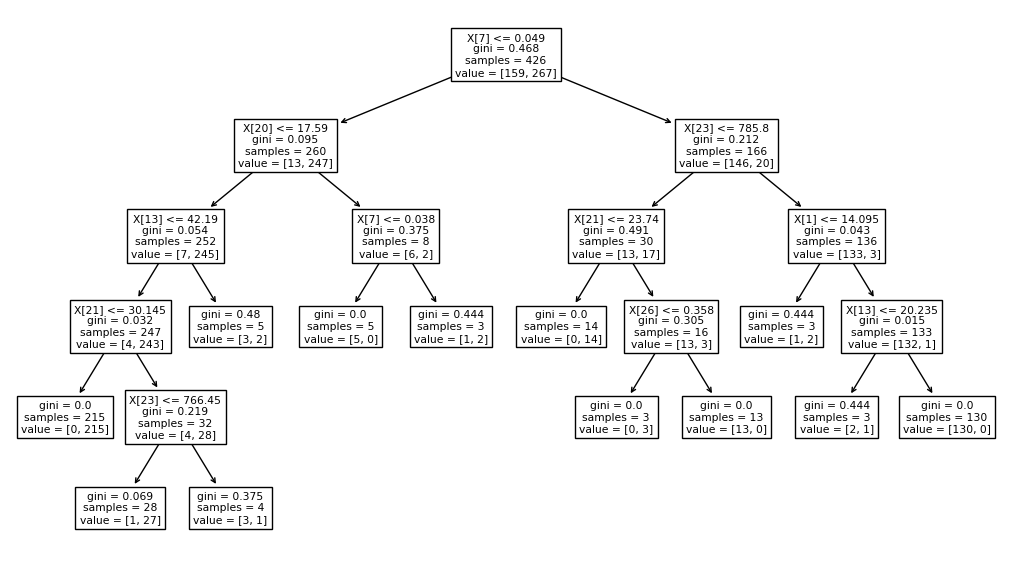

In [1308]:
tree.plot_tree(model.best_estimator_)